In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot
from scipy import stats
from scipy.stats import norm, skew

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import data
train = pd.read_csv('P:/Data Science/Kaggle/House Prices/train.csv')
test = pd.read_csv('P:/Data Science/Kaggle/House Prices/test.csv')

In [4]:
#Overall look the taining data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
#Comparing trainig and test sets
print(train.shape)
print(test.shape)
print(set(train.columns) - set(test.columns))

(1460, 81)
(1459, 80)
{'SalePrice'}


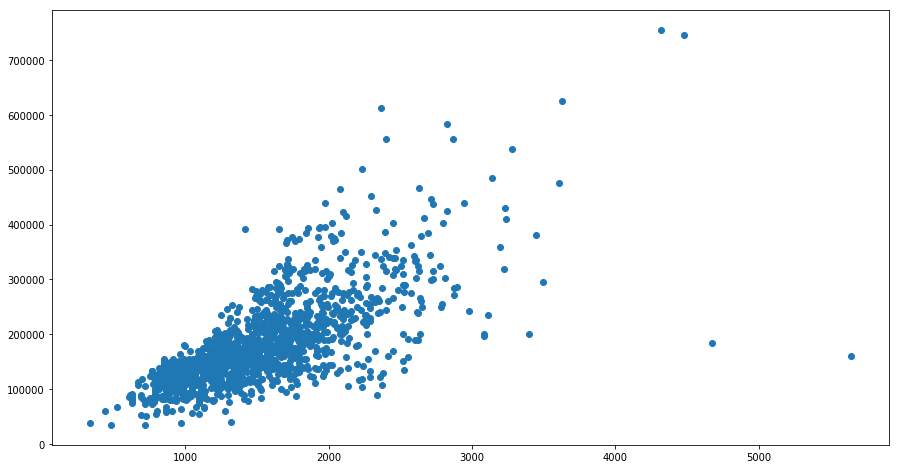

In [6]:
#Data documentation suggests to remove outliers in the training set by checking the "GR LIV AREA" feature
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])

In [7]:
#Dropping 4 outlies which has "GrLivArea" > 4000
for i in train['GrLivArea']:
    if i > 4000:
        train = train.drop(train[train['GrLivArea'] == i].index)

In [8]:
train.shape

(1456, 81)

In [9]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']
#Drop Id column from both train and test
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

In [10]:
train['SalePrice'] = np.log1p(train['SalePrice'])

In [11]:
#Saving number of rows of both train and test dataframes
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['SalePrice']
train.drop(['SalePrice'], axis=1, inplace=True)

In [12]:
#Concatenating train and test dfs 
all_data = pd.concat((train, test))

In [13]:
all_data.shape

(2915, 79)

In [14]:
#Dealing with missing values 
all_data_na = round(((all_data.isnull().sum()/len(all_data))*100).sort_values(ascending=False),2)
all_data_na.drop(all_data_na[all_data_na==0].index, inplace=True)
print(all_data_na)

PoolQC          99.73
MiscFeature     96.40
Alley           93.21
Fence           80.45
FireplaceQu     48.71
LotFrontage     16.67
GarageCond       5.45
GarageQual       5.45
GarageYrBlt      5.45
GarageFinish     5.45
GarageType       5.39
BsmtCond         2.81
BsmtExposure     2.81
BsmtQual         2.78
BsmtFinType2     2.74
BsmtFinType1     2.71
MasVnrType       0.82
MasVnrArea       0.79
MSZoning         0.14
BsmtHalfBath     0.07
Utilities        0.07
Functional       0.07
BsmtFullBath     0.07
BsmtFinSF2       0.03
BsmtFinSF1       0.03
Exterior2nd      0.03
BsmtUnfSF        0.03
TotalBsmtSF      0.03
Exterior1st      0.03
SaleType         0.03
Electrical       0.03
KitchenQual      0.03
GarageArea       0.03
GarageCars       0.03
dtype: float64


Text(0.5,1,'Percent missing data by feature')

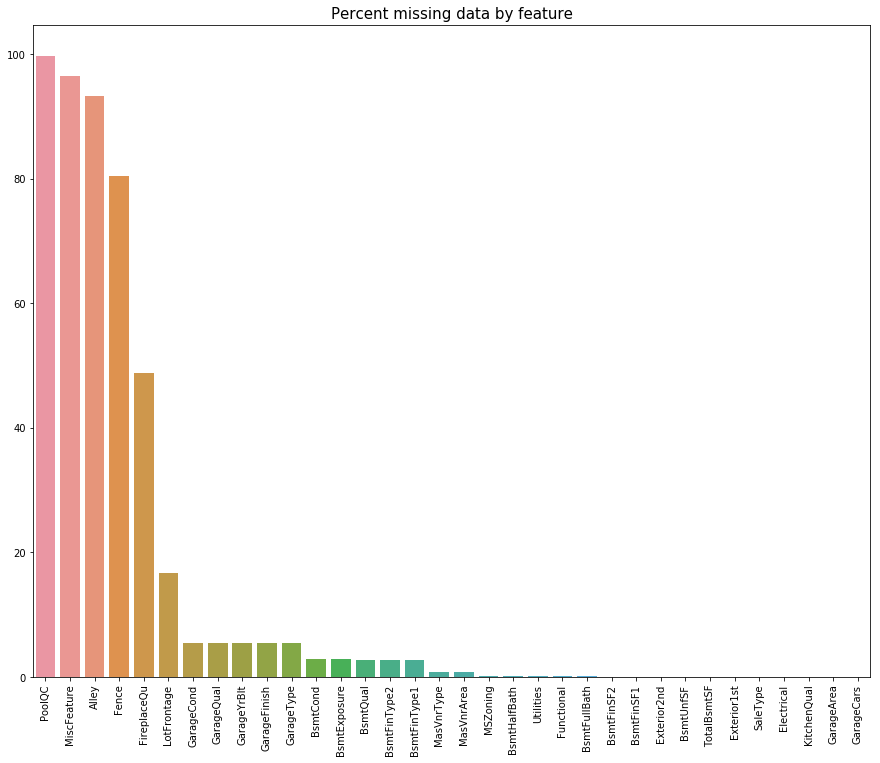

In [15]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.title('Percent missing data by feature', fontsize=15)

In [16]:
#filling missing data

In [17]:
all_data['PoolQC'] = all_data['PoolQC'].fillna("None")

In [18]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna("None")

In [19]:
all_data['Alley'] = all_data['Alley'].fillna("None")

In [20]:
all_data['Fence'] = all_data['Fence'].fillna("None")

In [21]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna("None")

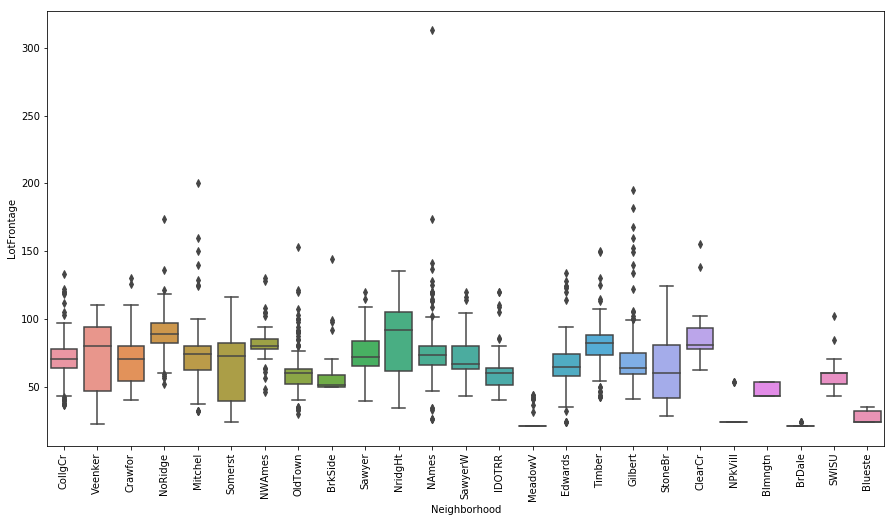

In [22]:
fig, ax = plt.subplots(figsize=(15,8))
plt.xticks(rotation='90')
sns.boxplot(x=all_data['Neighborhood'], y=all_data['LotFrontage'])

In [23]:
all_data['LotFrontage']=all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [24]:
for i in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[i] = all_data[i].fillna('None')

In [25]:
for i in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[i] = all_data[i].fillna(0)

In [26]:
for i in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[i] = all_data[i].fillna(0)

In [27]:
for i in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[i] = all_data[i].fillna('None')

In [28]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [29]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [30]:
all_data.drop(['Utilities'], axis=1, inplace=True)

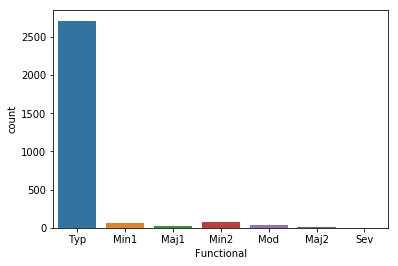

In [31]:
sns.countplot(all_data['Functional'])

In [32]:
all_data['Functional'].fillna('Typ', inplace=True)

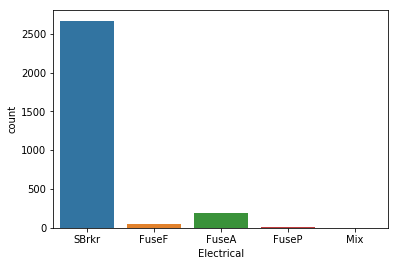

In [33]:
sns.countplot(all_data['Electrical'])

In [34]:
all_data['Electrical'].fillna(all_data['Electrical'].mode()[0], inplace=True)

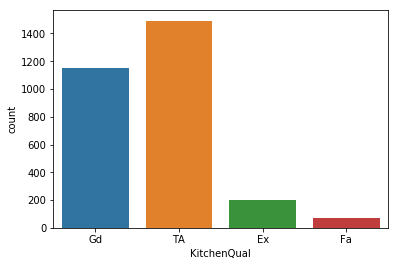

In [35]:
sns.countplot(all_data['KitchenQual'])

In [36]:
all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0], inplace=True)

In [37]:
all_data['Exterior1st'].isnull().sum()

1

In [38]:
#SaleType   
#Exterior1st    
#Exterior2nd

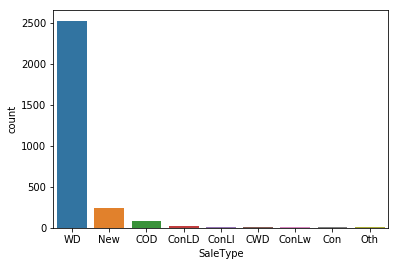

In [39]:
sns.countplot(all_data['SaleType'])

In [40]:
all_data['SaleType'].fillna(all_data['SaleType'].mode()[0], inplace=True)

In [41]:
all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0], inplace=True)
all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0], inplace=True)

In [42]:
all_data_na = round(((all_data.isnull().sum()/len(all_data))*100).sort_values(ascending=False),2)
all_data_na.drop(all_data_na[all_data_na==0].index, inplace=True)
print(all_data_na)

Series([], dtype: float64)


In [43]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype('str')

In [44]:
all_data['MSSubClass'].dtype

dtype('O')

In [45]:
all_data['OverallCond']=all_data['OverallCond'].astype('str')
all_data['OverallCond'].dtype

dtype('O')

In [46]:
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [47]:
#from sklearn.preprocessing import LabelEncoder


In [48]:
all_data.info()
print(all_data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915 entries, 0 to 1458
Data columns (total 78 columns):
MSSubClass       2915 non-null object
MSZoning         2915 non-null object
LotFrontage      2915 non-null float64
LotArea          2915 non-null int64
Street           2915 non-null object
Alley            2915 non-null object
LotShape         2915 non-null object
LandContour      2915 non-null object
LotConfig        2915 non-null object
LandSlope        2915 non-null object
Neighborhood     2915 non-null object
Condition1       2915 non-null object
Condition2       2915 non-null object
BldgType         2915 non-null object
HouseStyle       2915 non-null object
OverallQual      2915 non-null int64
OverallCond      2915 non-null object
YearBuilt        2915 non-null int64
YearRemodAdd     2915 non-null int64
RoofStyle        2915 non-null object
RoofMatl         2915 non-null object
Exterior1st      2915 non-null object
Exterior2nd      2915 non-null object
MasVnrType       2915 

In [49]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
all_data_encoded=all_data.copy()
for i in all_data_encoded:
    if all_data_encoded[i].dtype == 'O':
        all_data_encoded[i] = lbl.fit_transform(all_data_encoded[i])

In [50]:
all_data_encoded.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,3,65.0,8450,1,1,3,3,4,0,...,0,0,3,4,1,0,4,2,8,4
1,5,3,80.0,9600,1,1,3,3,2,0,...,0,0,3,4,1,0,7,1,8,4
2,10,3,68.0,11250,1,1,0,3,4,0,...,0,0,3,4,1,0,11,2,8,4
3,11,3,60.0,9550,1,1,0,3,0,0,...,0,0,3,4,1,0,4,0,8,0
4,10,3,84.0,14260,1,1,0,3,2,0,...,0,0,3,4,1,0,3,2,8,4


In [51]:
all_data_encoded.shape

(2915, 78)

In [52]:
X_train=all_data_encoded[:ntrain]
X_train.shape

(1456, 78)

In [53]:
y_train.shape

(1456,)

In [54]:
test=all_data_encoded[ntrain:]
test.shape

(1459, 78)

In [63]:
#Ridge Regression
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import Ridge
alpha=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
ridge_score= []
for i in alpha:
    ridge=Ridge(alpha=i, copy_X=True, fit_intercept=True)
    scores = cross_val_score(ridge, X_train, y_train)   
    ridge_score.append(scores.mean())
print(ridge_score) 

[0.901542854856901, 0.9015816182105891, 0.9016976241489164, 0.9019078528516715, 0.902061518772729, 0.9017760538635581, 0.9012630627771493, 0.9009687597240589]


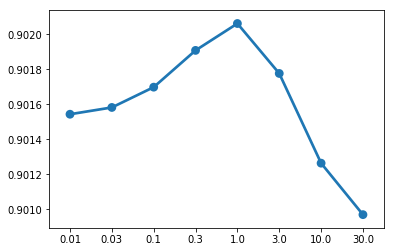

In [64]:
sns.pointplot(x=alpha, y=ridge_score)

In [63]:
#XGboost
from sklearn.cross_validation import cross_val_score
from xgboost import XGBRegressor
l_rate=[0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1.0]
XGboost_score= []
for i in l_rate:
    XGReg=XGBRegressor(n_estimators=10000, learning_rate=i)
    scores = cross_val_score(XGReg, X_train, y_train)   
    XGboost_score.append(scores.mean())
print(XGboost_score) 

[0.9034838118718845, 0.9048797630352343, 0.9019243242177679, 0.9013029059597738, 0.8862026537375355, 0.8747396497167466, 0.7995381189538078]


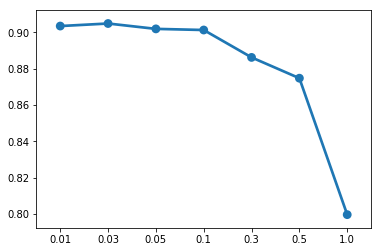

In [65]:
sns.pointplot(x=l_rate, y=XGboost_score)

In [69]:
#learning_rate = 0.03
XGBReg=XGBRegressor(n_estimators=10000, learning_rate=0.03)
XGBReg.fit(X=X_train, y=y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.03, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [70]:
predicted = np.expm1(XGBReg.predict(test))

In [72]:
submission=pd.DataFrame()
submission['Id']=test_ID
submission['SalePrice']=predicted
submission.to_csv(path_or_buf='P:/Data Science/Kaggle/House Prices/submission_xgboost.csv', index=False)